In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [32]:
def loss_function(y_orig, y_pred):
    cost = 0
    cost += ((y_orig - y_pred) ** 2)
    cost = cost.sum() / (df.shape[0])
    return cost

In [4]:
def gradient_descent_fast(X, y, w, b, alpha):
    n = len(X)
    y_pred = w * X + b
    error = y_pred - y
    
    w_d = (1/n) * np.dot(X, error)
    b_d = (1/n) * np.sum(error)

    
    new_w = w - alpha * w_d
    new_b = b - alpha * b_d
    return new_w, new_b

In [5]:
df = pd.read_csv('advertising.csv')
# df = df.sample(n=100, random_state = 1)

In [6]:
df_init = df.sample(n=200)

() () (200,)
w:  4.722765594186797
b:  15.043856449139604
R^2:  0.8118788353160077


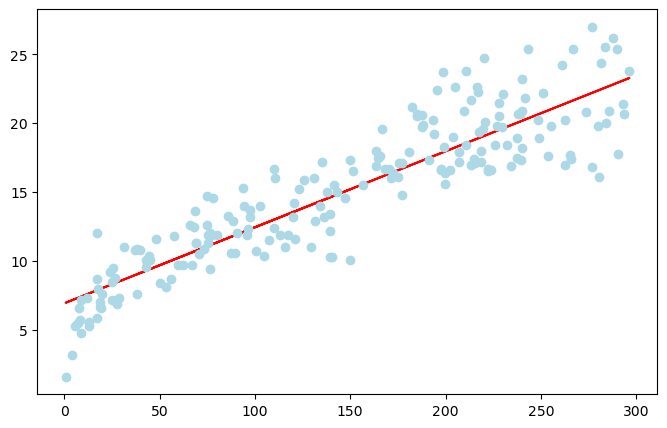

In [7]:
steps = 1000
w, w_old = 0, 1
b, b_old = 0, 1
X = df_init['TV'].values
X_scaled = (X - X.mean()) / X.std()
y = df_init['Sales'].values
eps = 0.01
alpha = 0.1
for step in range(steps):
    w_old, b_old = (w, b)
    w, b = gradient_descent_fast(X_scaled, y, w, b, alpha)
    if abs(w - w_old) < eps and abs(b - b_old) < eps:
        break
r_squared = (y.var() - loss_function_2(X_scaled, y, w, b)) / y.var()

print("w: ", w)
print("b: ", b)
print("R^2: ", r_squared)
w_orig = w/X.std()
b_orig = b - (w * X.mean())/X.std()
y_pred = w_orig * X + b_orig
fig, ax = plt.subplots(figsize=(8, 5))

w = w_orig
b = b_orig
ax.scatter(x=X, y=df_init['Sales'].values, color='lightblue')
ax.plot(X, y_pred, zorder=-1, color='red')

In [101]:
def linear_regression(X, y):
    steps = 1000
    w, w_old = 0, 1
    b, b_old = 0, 1
    X_scaled = (X - X.mean()) / X.std()
    eps = 0.01
    alpha = 0.1
    for step in range(steps):
        w_old, b_old = (w, b)
        w, b = gradient_descent_fast(X_scaled, y, w, b, alpha)
        if abs(w - w_old) < eps and abs(b - b_old) < eps:
            break
    r_squared = (y.var() - loss_function(X_scaled, y, w, b)) / y.var()
    w_orig = w/X.std()
    b_orig = b - (w * X.mean())/X.std()
    return (w_orig, b_orig)

In [68]:
### Calculating p-value
n = 50 ## number of samples
p_fit = 2
p_mean = 1
hist = []
for test in range(5000):
    df_sample = df.sample(n = n)
    X = df_sample['TV']
    y = df_sample['Sales']
    w, b = linear_regression(X, y)
    var_fit = loss_function(X, y, w, b)
    F = ((y.var() - var_fit) / (p_fit - p_mean)) / ((var_fit) / (n - p_fit))
    hist.append(F)

KeyboardInterrupt: 

In [76]:
hist_int = [round(i) for i in hist]

(array([ 9., 18., 35., 39., 65., 70., 52., 39., 39., 29., 26., 17., 13.,
         5.,  2.,  5.,  1.,  0.,  0.,  2.]),
 array([ 587. ,  655.4,  723.8,  792.2,  860.6,  929. ,  997.4, 1065.8,
        1134.2, 1202.6, 1271. , 1339.4, 1407.8, 1476.2, 1544.6, 1613. ,
        1681.4, 1749.8, 1818.2, 1886.6, 1955. ]),
 <BarContainer object of 20 artists>)

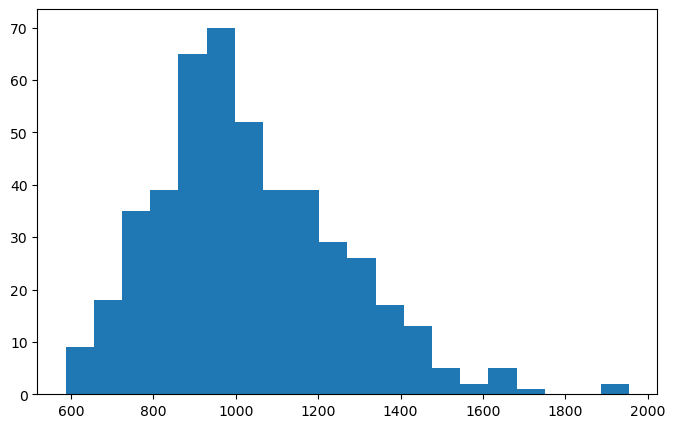

In [102]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(hist_int, bins=20)

In [8]:
ss_fit = loss_function(X, y, w, b)
ss_var = loss_function(X, y, 0, y.mean())
df1 = p_fit - p_mean
df2 = n - p_fit
F_original = ((ss_var - ss_fit) / (df1)) / ((ss_fit) / (df2))

TypeError: loss_function() takes 2 positional arguments but 4 were given

In [147]:
pred_y

array([ 7.01364683, 14.71215697, 13.65832633, 19.49876666, 17.39110538,
       10.73533293, 17.81263764, 10.80189065,  7.27433125,  7.91217611,
        8.29488303, 14.69551754, 10.89063428, 23.2592781 , 18.88310771,
       12.36599718, 17.69061514, 18.29518114,  8.05083804, 11.42309608,
        9.45409673, 19.63742859, 19.31018644, 19.20480338, 21.14052387,
       16.41492542, 18.81654998,  9.44300377, 19.04950202, 23.04296549,
       14.75652879, 18.05668263, 16.71998166, 21.70626452, 16.2263452 ,
       20.75227047, 19.98131016, 16.79208586, 20.24754106, 16.03221851,
       10.8129836 ,  7.20222705, 13.94674314, 14.90073719, 20.8909324 ,
        9.6537699 , 19.84819471, 13.06485329, 13.11477158, 13.47529259,
       17.57413912, 13.80253473, 10.76861179, 10.43027669,  9.16567992,
       11.11803984, 21.54541669, 13.23679407, 10.64104282, 16.09877623,
       14.47365846, 12.19960287, 22.83774584,  9.35980662, 11.72815232,
        8.72196176, 11.9500114 , 17.00285199,  7.45181851, 18.66

In [110]:
y

array([ 1.6, 10.3, 14.2, 18.4, 20.6, 12.5, 22.4, 11.3,  5.3,  8.7,  9.2,
       12.2, 10.5, 20.7, 17.4, 13.2, 20.2, 19. ,  6.6, 11.9, 10.1, 20.5,
       16.7, 20.1, 19.8, 16.7, 21.7, 10.4, 19.4, 25.4, 10.3, 16.4, 17.1,
       17.4, 19.6, 20.2, 16.9, 14.8, 20.7, 16.9, 11.3,  3.2, 15.9, 15. ,
       22.2, 11.6, 18.4, 16.7, 16. , 11.9, 17.3, 15.2, 13.6,  9.7, 10.8,
       14.7, 20.2, 11.9, 12.6, 17.5, 17.2, 14. , 20.9,  9.6, 13.3, 11. ,
       10.6, 17.9,  4.8, 18.4,  9.7,  7.2, 22.6,  8.4, 16.1, 20. , 10.6,
       13.2, 11. , 20.9, 12.9, 23.8, 24.2, 10.7, 17.3, 18. , 17. , 11.8,
       11.8, 16.7, 17.2, 12. , 20.5, 17.9, 27. , 16.7, 10.1, 26.2, 14. ,
       19.6, 16.1, 11.9, 18.9, 19.7, 10.9,  8.7, 14.6,  7.2, 13.7, 11. ,
       22.6, 12. , 16.4, 13.2, 18.9, 22.3, 20.8, 12.6, 11.9,  6.7,  9.4,
       17.2, 10.1, 10.4,  5.5, 18.3,  7. , 23.2, 17.5, 24.7, 12.9, 16.5,
        8.8, 19.8, 20.7, 18.2, 12.4, 22.1, 25.4,  6.6, 25.5, 14. ,  5.6,
       11.5, 17. , 21.2, 21.8, 17.7,  8. , 14.6, 16

### Scikit Learn

In [10]:
df = pd.read_csv('advertising.csv')
X_orig = df['TV']
X = [[i] for i in df['TV'].values]
y = df['Sales']

In [11]:
reg = LinearRegression().fit(X, y)

In [12]:
print(reg.coef_, reg.intercept_)

[0.05546477] 6.9748214882298925


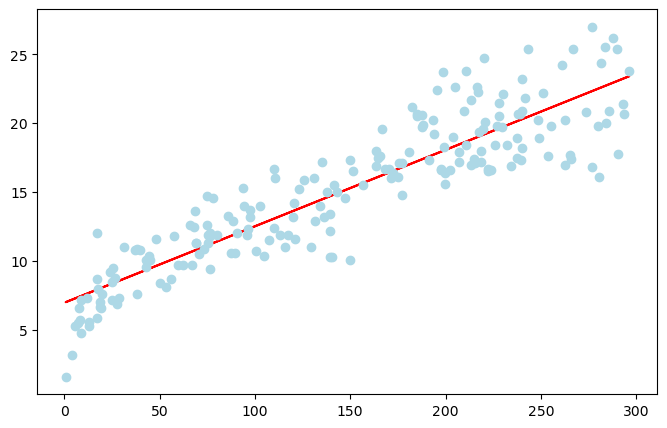

In [21]:
w = reg.coef_
b = reg.intercept_
pred_y = w * X_orig + b 
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(x=df['TV'].values, y=df['Sales'].values, color='lightblue')
ax.plot(X, pred_y, zorder=-1, color='red')

In [22]:
print(y.shape, pred_y.shape)

(200,) (200,)


In [31]:
n = X_orig.shape[0]
df1 = 1
df2 = 198

ss_fit = loss_function(y, pred_y) * n
ss_hello = loss_function_2(X_orig, y, w, b)
ss_mean = y.var() * (n - 1)
F_scikit = ((ss_mean - mse(y, pred_y)) / (df1)) / ((mse(y, pred_y)) / (df2))
# print(mse(y, pred_y), ss_fit, ss_mean)

(200,)
(1,) () (200,)


In [33]:
F_scikit

np.float64(210637.34256345252)